In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
from numpy import nan
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings("ignore")
from scipy.interpolate import make_interp_spline

In [3]:
# df = pd.read_csv("sample.csv") #sample
df = pd.read_csv("BasicCompanyDataAsOneFile-2021-11-01.csv")

### DF1 of Incorporation Date and SIC company

In [4]:
#preprocessing the date
df['IncorporationDate'] = pd.to_datetime(df['IncorporationDate'], errors = 'coerce')
df.dropna(subset = ['IncorporationDate'], inplace=True)
df_sic = pd.DataFrame()
df[['DissolutionDate','IncorporationDate']] = df[['DissolutionDate','IncorporationDate']].apply(lambda x: pd.to_datetime(x,format='%d/%m/%Y'))
df_sic[['SICCode.SicText_1','IncorporationDate']] = df[['SICCode.SicText_1','IncorporationDate']]

#set time limit
df_sic = df_sic[df_sic['IncorporationDate'] > '2020-01-01T00:00:00.000000000']
df_sic = df_sic[df_sic['IncorporationDate'] < '2021-11-01T00:00:00.000000000']

#get only year and month
df_sic['date'] = df_sic['IncorporationDate'].dt.strftime( '%Y-%m') #-%d

#leave only what we want
df_sic_plot = df_sic[['SICCode.SicText_1','date']]
df_sic_plot["SICCode.SicText_1"] = df_sic_plot["SICCode.SicText_1"].str[0:2]
df_sic_plot['SICCode.SicText_1'] = df_sic_plot[df_sic_plot["SICCode.SicText_1"]!= 'No']
df_sic_plot['SICCode.SicText_1'] = pd.to_numeric(df_sic_plot['SICCode.SicText_1'])
# df_sic_plot

### DF2 of Classficaiton of Business

In [5]:
df_business_class = pd.read_csv("business_classification.csv")
df_business_class.rename(columns={"SIC": "SICCode.SicText_1"},inplace=True)
df_business_class = df_business_class.drop(columns={'class'})
df_business_class = df_business_class.drop(columns={'Tertiary industry'})
# df_business_class

### Merge DF1 and DF2

In [6]:
df_final = df_sic_plot.merge(df_business_class, how='left')
df_final['SICCode.SicText_1'].fillna(0, inplace=True)
df_final = df_final.drop(columns={'SICCode.SicText_1'})
df_final.rename(columns={'num':'SICCode.SicText_1'},inplace=True)
# df_final

### DF for plotting at bottom

In [7]:
df_final

,date,SICCode.SicText_1
0,2021-05,9.0
1,2021-07,9.0
2,2021-02,6.0
3,2021-01,11.0
4,2020-04,7.0
...,...,...
1280917,2020-02,9.0
1280918,2021-03,8.0
1280919,2020-04,3.0
1280920,2021-10,11.0


In [8]:
time_1 = df_final[df_final['date']=='2020-01'].groupby('SICCode.SicText_1').count().T
time_2 = df_final[df_final['date']=='2020-02'].groupby('SICCode.SicText_1').count().T
time_3 = df_final[df_final['date']=='2020-03'].groupby('SICCode.SicText_1').count().T
time_4 = df_final[df_final['date']=='2020-04'].groupby('SICCode.SicText_1').count().T
time_5 = df_final[df_final['date']=='2020-05'].groupby('SICCode.SicText_1').count().T
time_6 = df_final[df_final['date']=='2020-06'].groupby('SICCode.SicText_1').count().T
time_7 = df_final[df_final['date']=='2020-07'].groupby('SICCode.SicText_1').count().T
time_8 = df_final[df_final['date']=='2020-08'].groupby('SICCode.SicText_1').count().T
time_9 = df_final[df_final['date']=='2020-09'].groupby('SICCode.SicText_1').count().T
time_10 = df_final[df_final['date']=='2020-10'].groupby('SICCode.SicText_1').count().T
time_11 = df_final[df_final['date']=='2020-11'].groupby('SICCode.SicText_1').count().T
time_12 = df_final[df_final['date']=='2020-12'].groupby('SICCode.SicText_1').count().T

time_11 = df_final[df_final['date']=='2021-01'].groupby('SICCode.SicText_1').count().T
time_12 = df_final[df_final['date']=='2021-02'].groupby('SICCode.SicText_1').count().T
time_13 = df_final[df_final['date']=='2021-03'].groupby('SICCode.SicText_1').count().T
time_14 = df_final[df_final['date']=='2021-04'].groupby('SICCode.SicText_1').count().T
time_15 = df_final[df_final['date']=='2021-05'].groupby('SICCode.SicText_1').count().T
time_16 = df_final[df_final['date']=='2021-06'].groupby('SICCode.SicText_1').count().T
time_17 = df_final[df_final['date']=='2021-07'].groupby('SICCode.SicText_1').count().T
time_18 = df_final[df_final['date']=='2021-08'].groupby('SICCode.SicText_1').count().T
time_19 = df_final[df_final['date']=='2021-09'].groupby('SICCode.SicText_1').count().T
time_110 = df_final[df_final['date']=='2021-10'].groupby('SICCode.SicText_1').count().T
time_111 = df_final[df_final['date']=='2021-11'].groupby('SICCode.SicText_1').count().T
time_112 = df_final[df_final['date']=='2021-12'].groupby('SICCode.SicText_1').count().T

all_time = pd.concat([time_1, time_2, time_3,time_4,
                      time_5, time_6, time_7,time_8,
                      time_9, time_10, time_11,time_12,
                      time_11, time_12, time_13,time_14,
                      time_15, time_16, time_17,time_18,
                      time_19, time_110, time_111,time_112,
                     ])

all_time = all_time.fillna(0)

all_time = all_time.T.reset_index()
all_time = all_time.T
all_time = all_time.reset_index().drop(columns={'index'})
all_time = all_time.loc[1:22]
all_time = all_time.set_axis(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10'], axis=0)

# all_time

In [9]:
all_time

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2020-01,277.0,68.0,2195.0,298.0,5295.0,7920.0,2411.0,3396.0,3336.0,2185.0,4512.0,5480.0,3722.0,166.0,914.0,1919.0,1155.0,2598.0,535.0,695.0
2020-02,316.0,68.0,2204.0,284.0,5569.0,8404.0,2502.0,3517.0,3445.0,2453.0,4844.0,5751.0,3811.0,145.0,1043.0,1957.0,1259.0,2763.0,620.0,922.0
2020-03,318.0,52.0,1890.0,253.0,4287.0,7215.0,1979.0,3106.0,3142.0,2186.0,3788.0,5204.0,3454.0,127.0,851.0,1753.0,1001.0,2452.0,576.0,823.0
2020-04,279.0,71.0,1912.0,265.0,4001.0,8277.0,1685.0,2341.0,3409.0,2087.0,3453.0,5119.0,3224.0,109.0,869.0,1644.0,924.0,2120.0,477.0,937.0
2020-05,277.0,57.0,2051.0,266.0,4759.0,9462.0,1935.0,2895.0,3080.0,2054.0,3992.0,4981.0,3446.0,145.0,861.0,1529.0,925.0,2286.0,495.0,1053.0
2020-06,429.0,80.0,2845.0,371.0,6544.0,12788.0,2595.0,4145.0,4205.0,2553.0,5130.0,6321.0,5012.0,206.0,1223.0,2133.0,1268.0,3489.0,660.0,1257.0
2020-07,445.0,85.0,3166.0,398.0,7207.0,13718.0,2968.0,4677.0,4358.0,2805.0,6223.0,6994.0,5460.0,201.0,1338.0,2321.0,1451.0,4034.0,764.0,1321.0
2020-08,333.0,70.0,2646.0,324.0,6045.0,11207.0,2452.0,3722.0,3657.0,2351.0,5016.0,5666.0,4575.0,181.0,1148.0,2039.0,1189.0,3603.0,586.0,987.0
2020-09,390.0,78.0,2902.0,412.0,7241.0,12772.0,3748.0,4707.0,4325.0,2889.0,5678.0,6877.0,5229.0,199.0,1226.0,2381.0,1312.0,3812.0,688.0,1070.0
2020-10,393.0,103.0,3020.0,398.0,7077.0,12357.0,2965.0,4286.0,4348.0,2877.0,5669.0,7082.0,4899.0,184.0,1249.0,2302.0,1290.0,3438.0,733.0,1124.0


In [10]:
df_sic_plot_sum = []
for i in range(22):
    df_sic_plot_sum.append(all_time.iloc[i].sum())
# df_sic_plot_sum

In [11]:
df_sic_plot_mean = df_sic_plot.groupby('date')['SICCode.SicText_1'].count()
df_sic_plot_mean = pd.DataFrame(df_sic_plot_mean)
df_sic_plot_mean.reset_index(inplace = True)
# df_sic_plot_mean

### DF for plotting at top

In [12]:
df_covid = pd.read_csv("data_2021-Dec-06.csv")
df_covidcase = df_covid[['date','newCasesByPublishDate']]

#force the dates which are outside the bounds to NaT, limitation(1677-2262)
df_covidcase['date'] = pd.to_datetime(df_covidcase['date'], errors = 'coerce')

#set time limit
df_covidcase = df_covidcase[(df_covidcase['date'] > '2020-01-01')]
df_covidcase = df_covidcase[(df_covidcase['date'] < '2021-11-01')]

#get only year and month
df_covidcase['date'] = df_covidcase['date'].dt.strftime('%Y-%m')
df_covidcase_plot = df_covidcase[['newCasesByPublishDate','date']]

#Groupby to have sum per month
df_covidcase_plot = df_covidcase_plot.groupby('date').sum()
df_covidcase_plot.reset_index(inplace=True)
# df_covidcase_plot

### Plotting Out-Total

<Figure size 1080x504 with 0 Axes>

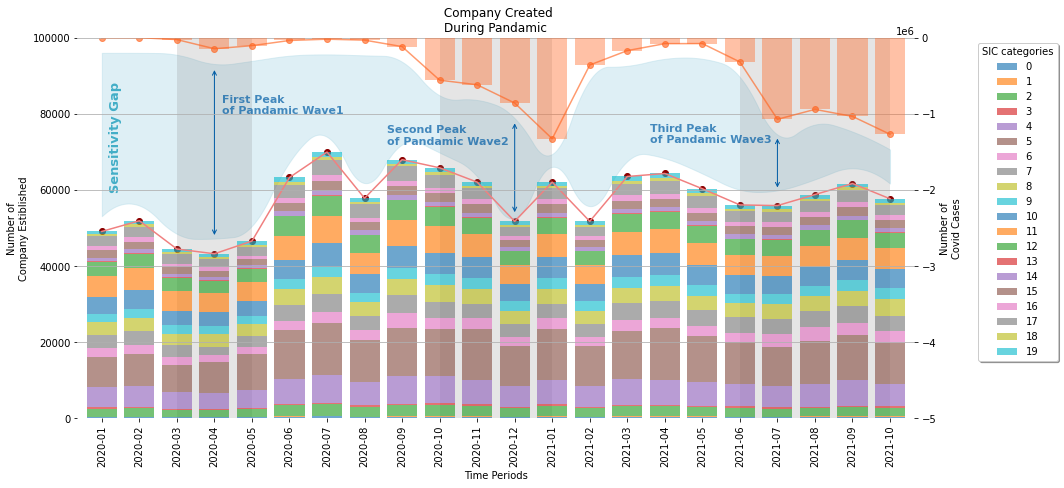

In [13]:
#Set the Variable
x1 = df_sic_plot_mean['date']
y1 = df_sic_plot_mean['SICCode.SicText_1']
x1_len = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
x2 = df_covidcase_plot['date']
y2 = df_covidcase_plot['newCasesByPublishDate']

#Set the river
area1 = y1.tolist()
area2 = y2.tolist()

param = np.linspace(0, 1, len(x1_len))
spl = make_interp_spline(param, np.c_[x1_len,area1], k=2)
x1_new, y_area1_smooth = spl(np.linspace(0, 1, len(x1_len) * 100)).T
y_area1_smooth = [int(i)+4000 for i in y_area1_smooth]

param = np.linspace(0, 1, len(x1_len))
spl = make_interp_spline(param, np.c_[x1_len,area2], k=2)
x1_new2, y_area1_smooth2 = spl(np.linspace(0, 1, len(x1_len) * 100)).T
y_area1_smooth2 = [100000-(int(i)*((100000-0)/5000000-0))-4000 for i in y_area1_smooth2]

# #Set the Bar colors
# colors = ['#000000','#110003','#220007','#33000b','#44000f','#550013','#660016','#77001a',
# '#88001e','#990022','#aa0026','#bb0029','#cc002d','#dd0031','#ee0035','#ff0039',
# '#fe1146','#ff2153','#ff3260','#ff436d','#fe557b','#ff6588']

##create figure
fig = plt.figure(figsize=(15, 7))
##create plot
# ax = fig.add_subplot(111)


#####<!-- Plot at the borrom -->#####
# ax = fig.add_axes([0,0,1,1])
ax = all_time.plot.bar(stacked=True,figsize=(15, 7),
                       alpha=0.65, zorder=2, 
                       width=0.8,
#                        color=colors
                      )
ax.scatter(x1, df_sic_plot_sum, c='darkred')
ax.plot(x1, df_sic_plot_sum, c= 'lightcoral')

ax.set_ylim(bottom=0000, top=100000, auto=False,)

## axes
ax.set_xlabel('Time Periods')
ax.set_ylabel('Number of\nCompany Estiblished')
### other axes
plt.title(" Company Created\nDuring Pandamic")
ax.set_xticks(x1_len)
plt.xticks(rotation='vertical')

## aest
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)



#####<!-- Plot at the top -->#####
axs = ax.twinx()
axs.bar(x1, -y2, color='#ff6622' , alpha=0.4, zorder=2, width=0.8)

axs.scatter(x1, -y2, c='#ff6622', alpha=0.65,)
axs.plot(x1, -y2, c= '#ff6622', alpha=0.65,)
ax.fill_between(x1_new,y_area1_smooth,y_area1_smooth2, interpolate=True ,alpha=0.4, color='lightblue') #where=(x1>=10),
ax.axvspan('2020-03', '2020-05', facecolor='grey', alpha=0.2)
ax.axvspan('2020-10', '2021-01', facecolor='grey', alpha=0.2)
ax.axvspan('2021-06', '2021-10', facecolor='grey', alpha=0.2)

#axvspan(xmin, xmax, ymin=0, ymax=1, **kwargs)


axs.set_ylim(bottom=-5000000, top=0, auto=False,)
plt.xticks(rotation='vertical')

# ax.annotate("test", xy=(x1_len[3], area1[4]), #xytext=(0, area2[4]),
#             arrowprops=dict(arrowstyle="<->"))
# ax.arrow(x1_len[3], area1[4], 0, area2[4], width = 0.05,arrowprops=dict(arrowstyle="<->"))
ax.annotate(
    '', xy=(3, 92000), xycoords='data',
    xytext=(3, 47600), textcoords='data',
    arrowprops={'arrowstyle': '<->','color':'#005ca5'})
ax.annotate("First Peak\nof Pandamic Wave1", xy=(3.2, 80000), xytext=(3.2, 80000), weight='bold',
            size = 11 , color="#005ca5", alpha=0.7)

ax.annotate(
    '', xy=(11, 78000), xycoords='data',
    xytext=(11, 53600), textcoords='data',
    arrowprops={'arrowstyle': '<->','color':'#005ca5'})
ax.annotate("Second Peak\nof Pandamic Wave2", xy=(7.6, 72000), xytext=(7.6, 72000), weight='bold',
            size = 11 , color="#005ca5", alpha=0.7)

ax.annotate(
    '', xy=(18, 60100), xycoords='data',
    xytext=(18, 74000), textcoords='data',
    arrowprops={'arrowstyle': '<->','color':'#005ca5'})
ax.annotate("Third Peak\nof Pandamic Wave3", xy=(14.6, 72400), xytext=(14.6, 72400), weight='bold',
            size = 11 , color="#005ca5", alpha=0.7)

ax.annotate("Sensitivity Gap", xy=(0.2, 60000), xytext=(0.2, 60000), weight='bold',
            size = 13 , color="#0092b3", alpha=0.7,rotation=90)

## aest
axs.spines['right'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['bottom'].set_visible(False)

## axes
axs.set_yticks(np.linspace(axs.get_yticks()[0], axs.get_yticks()[-1], len(ax.get_yticks())))
axs.set_ylabel('Number of\nCovid Cases')


# (4) show plot

ax.legend(loc='center left', bbox_to_anchor=(1.07, 0.5),
          ncol=1, fancybox=True, shadow=True)

ax.legend(title='SIC categories'
          , bbox_to_anchor=(1.07, 1),
          ncol=1, fancybox=True, shadow=True
          
         )

# axs.legend()
plt.grid()
plt.show()

### Plotting Out-simple

In [14]:
# #Set the Variable
# x1 = df_sic_plot_mean['date']
# y1 = df_sic_plot_mean['SICCode.SicText_1']
# x1_len = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
# x2 = df_covidcase_plot['date']
# y2 = df_covidcase_plot['newCasesByPublishDate']

# #Set the river
# area1 = y1.tolist()
# area2 = y2.tolist()

# param = np.linspace(0, 1, len(x1_len))
# spl = make_interp_spline(param, np.c_[x1_len,area1], k=2)
# x1_new, y_area1_smooth = spl(np.linspace(0, 1, len(x1_len) * 100)).T
# y_area1_smooth = [int(i)+200 for i in y_area1_smooth]

# param = np.linspace(0, 1, len(x1_len))
# spl = make_interp_spline(param, np.c_[x1_len,area2], k=2)
# x1_new2, y_area1_smooth2 = spl(np.linspace(0, 1, len(x1_len) * 100)).T
# y_area1_smooth2 = [5000-(int(i)*((5000-0)/5000000-0))-200 for i in y_area1_smooth2]

# # #Set the Bar colors
# # colors = ['#000000','#110003','#220007','#33000b','#44000f','#550013','#660016','#77001a',
# # '#88001e','#990022','#aa0026','#bb0029','#cc002d','#dd0031','#ee0035','#ff0039',
# # '#fe1146','#ff2153','#ff3260','#ff436d','#fe557b','#ff6588']

# ##create figure
# fig = plt.figure(figsize=(15, 7))
# ##create plot
# # ax = fig.add_subplot(111)


# #####<!-- Plot at the borrom -->#####
# # ax = fig.add_axes([0,0,1,1])
# ax = all_time.plot.bar(stacked=True,figsize=(15, 7),
#                        alpha=0.65, zorder=2, 
#                        width=0.8,
# #                        color=colors
#                       )
# ax.scatter(x1, test, c='darkred')
# ax.plot(x1, test, c= 'lightcoral')

# ax.set_ylim(bottom=0000, top=5000, auto=False,)

# ## axes
# ax.set_xlabel('Time Periods')
# ax.set_ylabel('Number of\nCompany Estiblished')
# ### other axes
# plt.title(" Company Created\nDuring Pandamic")
# ax.set_xticks(x1_len)
# plt.xticks(rotation='vertical')

# ## aest
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)



# #####<!-- Plot at the top -->#####
# axs = ax.twinx()
# axs.bar(x1, -y2, color='#ff6622' , alpha=0.4, zorder=2, width=0.8)

# axs.scatter(x1, -y2, c='#ff6622', alpha=0.65,)
# axs.plot(x1, -y2, c= '#ff6622', alpha=0.65,)
# ax.fill_between(x1_new,y_area1_smooth,y_area1_smooth2, interpolate=True ,alpha=0.4, color='lightblue') #where=(x1>=10),


# axs.set_ylim(bottom=-5000000, top=0, auto=False,)
# plt.xticks(rotation='vertical')

# # ax.annotate("test", xy=(x1_len[3], area1[4]), #xytext=(0, area2[4]),
# #             arrowprops=dict(arrowstyle="<->"))
# # ax.arrow(x1_len[3], area1[4], 0, area2[4], width = 0.05,arrowprops=dict(arrowstyle="<->"))
# ax.annotate(
#     '', xy=(3, 4600), xycoords='data',
#     xytext=(3, 2380), textcoords='data',
#     arrowprops={'arrowstyle': '<->','color':'#005ca5'})
# ax.annotate("First Peak\nof Pandamic Wave1", xy=(3.2, 4000), xytext=(3.2, 4000), weight='bold',
#             size = 11 , color="#005ca5", alpha=0.7)

# ax.annotate(
#     '', xy=(11, 3900), xycoords='data',
#     xytext=(11, 2680), textcoords='data',
#     arrowprops={'arrowstyle': '<->','color':'#005ca5'})
# ax.annotate("Second Peak\nof Pandamic Wave2", xy=(7.6, 3600), xytext=(7.6, 3600), weight='bold',
#             size = 11 , color="#005ca5", alpha=0.7)

# ax.annotate(
#     '', xy=(18, 3005), xycoords='data',
#     xytext=(18, 3700), textcoords='data',
#     arrowprops={'arrowstyle': '<->','color':'#005ca5'})
# ax.annotate("Third Peak\nof Pandamic Wave3", xy=(14.6, 3620), xytext=(14.6, 3620), weight='bold',
#             size = 11 , color="#005ca5", alpha=0.7)

# ax.annotate("G\nA\nP\n \nR\nI\nV\nE\nR", xy=(0.2, 3000), xytext=(0.2, 3000), weight='bold',
#             size = 13 , color="#0092b3", alpha=0.7)

# ## aest
# axs.spines['right'].set_visible(False)
# axs.spines['left'].set_visible(False)
# axs.spines['top'].set_visible(False)
# axs.spines['bottom'].set_visible(False)

# ## axes
# axs.set_yticks(np.linspace(axs.get_yticks()[0], axs.get_yticks()[-1], len(ax.get_yticks())))
# axs.set_ylabel('Number of\nCovid Cases')


# # (4) show plot

# ax.legend(loc='center left', bbox_to_anchor=(1.07, 0.5),
#           ncol=1, fancybox=True, shadow=True)
# # axs.legend()
# plt.grid()
# plt.show()